# Clasificación de perros y gatos con Keras


Step 1: Conexión con Drive

In [8]:
!ls "./dataset_dogs_vs_cats/"

test
train


Step 2: Preprocessing and Loading Data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for rescaling images
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training data
train = datagen.flow_from_directory(
    directory='./dataset_dogs_vs_cats/train',
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary"
)

# Load test data
test = datagen.flow_from_directory(
    directory='./dataset_dogs_vs_cats/test',
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary"
)


Found 8001 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


Step 3: Build the CNN Model

Includes convolutional layers, max-pooling, and fully connected layers.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Initialize the model
classifier = Sequential()

# Convolution layer 1
classifier.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu', padding='same'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))

# Convolution layer 2
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))

# Convolution layer 3
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))

# Convolution layer 4
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))

# Flatten the results from convolutional layers
classifier.add(Flatten())

# Fully connected layer
classifier.add(Dense(units=600, activation='relu'))
classifier.add(Dropout(0.5))

# Output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the model
classifier.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])


ImportError: cannot import name 'SDG' from 'keras.optimizers' (c:\Users\ed\Documents\maestria\jupyter\Lib\site-packages\keras\optimizers\__init__.py)

Step 4: Train the Model and graph the training process

c:\Users\ed\Documents\maestria\jupyter\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 114s 446ms/step - accuracy: 0.5607 - loss: 0.6746 - val_accuracy: 0.6804 - val_loss: 0.6050
Epoch 2/5
  1/250 ━━━━━━━━━━━━━━━━━━━━ 1:54 459ms/step - accuracy: 0.4688 - loss: 0.6997

c:\Users\ed\Documents\maestria\jupyter\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.4688 - loss: 0.6997 - val_accuracy: 0.6840 - val_loss: 0.6046
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 115s 458ms/step - accuracy: 0.6928 - loss: 0.5791 - val_accuracy: 0.5862 - val_loss: 0.7520
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.5938 - loss: 0.6985 - val_accuracy: 0.5811 - val_loss: 0.7552
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 114s 457ms/step - accuracy: 0.7287 - loss: 0.5371 - val_accuracy: 0.7540 - val_loss: 0.5031


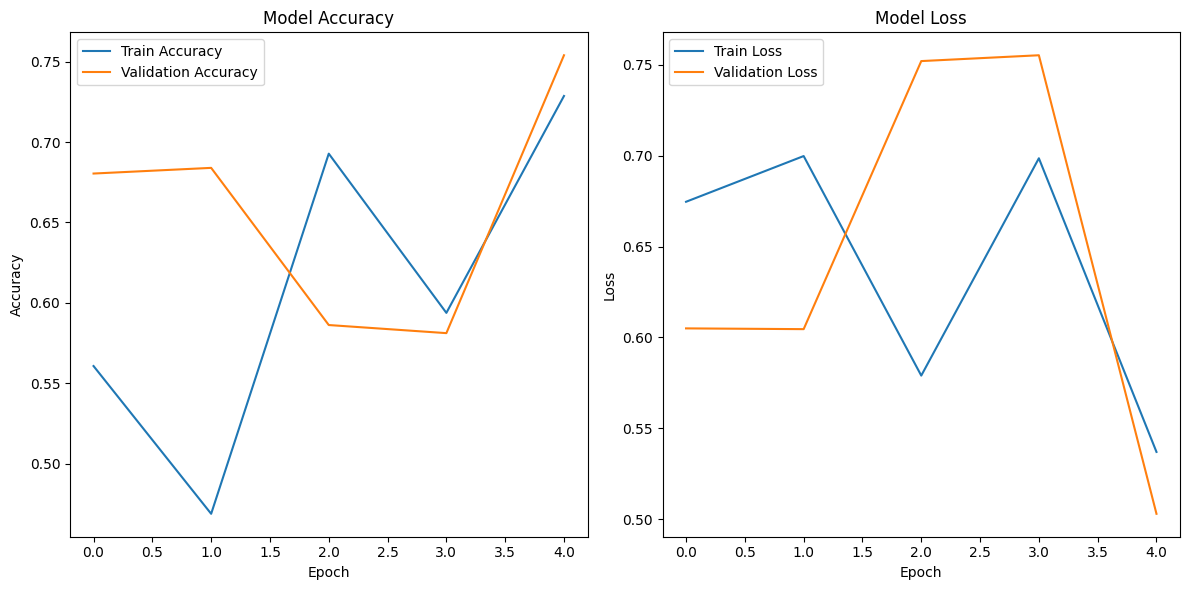

In [ ]:

# Train the model and capture the history
history = classifier.fit(
    train,
    steps_per_epoch=train.samples // train.batch_size,
    epochs=5,
    validation_data=test,
    validation_steps=test.samples // test.batch_size
)

# Plotting training & validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Modelo de clasificacion CNN
classifier = Sequential()

## convolucion #1
classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu', padding='same'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size = (2, 2)))

## convolucion #2
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size = (2, 2)))

## convolucion #3

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size = (2, 2)))

## convolucion #4

classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size = (2, 2)))


classifier.add(Flatten())  ### Aplanamos los valores

classifier.add(Dense(units = 600, activation = 'relu'))  ## utilizamos 600 neuronas

classifier.add(Dropout(0.5))
classifier.add(Dense(units = 1, activation = 'sigmoid')) ## capa final sigmoid con una sola neurona

sgd = SGD(learning_rate=0.1)
classifier.compile(optimizer = Adam(learning_rate=0.0003), loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(train,
#steps_per_epoch = 8000,
epochs = 25,
validation_data = test,
shuffle = True
#validation_steps = 2000
)

c:\Users\ed\Documents\maestria\jupyter\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ed\Documents\maestria\jupyter\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 114s 446ms/step - accuracy: 0.6053 - loss: 0.6539 - val_accuracy: 0.6798 - val_loss: 0.5959
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 113s 449ms/step - accuracy: 0.7113 - loss: 0.5602 - val_accuracy: 0.7394 - val_loss: 0.5193
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 112s 448ms/step - accuracy: 0.7690 - loss: 0.4808 - val_accuracy: 0.7884 - val_loss: 0.4525
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 112s 447ms/step - accuracy: 0.7984 - loss: 0.4285 - val_accuracy: 0.8184 - val_loss: 0.4132
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 115s 459ms/step - accuracy: 0.8220 - loss: 0.3912 - val_accuracy: 0.8044 - val_loss: 0.4290
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 113s 451ms/step - accuracy: 0.8441 - loss: 0.3475 - val_accuracy: 0.8379 - val_loss: 0.3678
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 114s 453ms/step - accuracy: 0.8685 - loss: 0.3062 - val_accuracy: 0.7849 - val_loss: 0.4430
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 114s 453ms/step - accuracy: 0.8859 -

## Transfer learning
Three models — VGG16, EfficientNet, and ResNet50 — are solid choices, they have different strengths. Here's a comparison:

- VGG16: #Alternative VGG19

Pros: Simple and easy to use. Good baseline for smaller datasets.
Cons: Large number of parameters, which can lead to slower training and high memory usage. It is less efficient than newer models like EfficientNet or ResNet.
Best for: Simpler problems or when you need a straightforward approach.

- EfficientNet:  # Alternative MobileNet

Pros: Known for being more efficient and achieving state-of-the-art performance with fewer parameters. It's designed to be computationally efficient and can scale well for different problems.
Cons: Slightly more complex than VGG16, but it is still quite efficient.
Best for: Faster training with fewer resources and high accuracy.

- ResNet50:  #alternative ResNet34

Pros: Very popular in transfer learning tasks. It’s very deep, yet its residual blocks allow for better learning of deep models. It has shown excellent performance on many tasks, including classification.
Cons: Slightly more computationally intensive than VGG16, but generally faster than VGG16 in practice.
Best for: Deep learning tasks requiring very good performance.

Let's Do Efficient Net

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


Load the pre-trained EfficientNet model without the top layer (to replace it with your own classifier):

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def create_grayscale_efficientnet(input_shape=(150, 150, 1), num_classes=1):
    # Input layer
    inputs = layers.Input(shape=input_shape)
    
    # Initial conv block for grayscale
    x = layers.Conv2D(32, 3, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)
    
    # Add EfficientNet-like blocks
    # Block 1
    x = layers.SeparableConv2D(16, 3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)
    
    # Block 2
    x = layers.SeparableConv2D(24, 3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    # Add more blocks as needed...
    # For simplicity, I'm using fewer blocks than the full EfficientNet
    
    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)
    
    # Create model
    model = models.Model(inputs, outputs)
    return model

# Create and compile the model
model = create_grayscale_efficientnet(input_shape=(150, 150, 1))
model.compile(
    optimizer=Adam(learning_rate=0.0003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

Model: "functional_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 150, 150, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 75, 75, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 75, 75, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d (SeparableConv2D)   │ (None, 75, 75, 16)          │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_1 (SeparableConv2D) │ (None, 75, 75, 24)          │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 75, 75, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 75, 75, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 38, 38, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 24)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,265 (20.57 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 144 (576.00 B)

Data Preprocessing with ImageDataGenerator:

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training and test data
train = datagen.flow_from_directory(
    directory='./dataset_dogs_vs_cats/train',
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary"
)

test = datagen.flow_from_directory(
    directory='./dataset_dogs_vs_cats/test',
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary"
)


Found 8001 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


In [39]:
# Make sure your first Conv2D layer has input_shape=(150, 150, 3)
classifier = Sequential()

# First convolutional layer - make sure input_shape matches your data
classifier.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu', padding='same'))
classifier.add(MaxPooling2D(strides=(2,2), pool_size=(2, 2)))

# Rest of your model remains the same

Train and Plot the model:

In [43]:
# First, let's check the data pipeline
print("Training samples:", train.samples)
print("Batch size:", train.batch_size)
print("Steps per epoch:", train.samples // train.batch_size)

# Then, train the model with proper error handling
try:
    history = model.fit(
        train,
        steps_per_epoch=train.samples // train.batch_size,
        epochs=3,
        validation_data=test,
        validation_steps=test.samples // test.batch_size,
        verbose=1
    )
    
    # Plotting training & validation accuracy
    plt.figure(figsize=(12, 6))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print("Error during training:", str(e))
    print("\nTroubleshooting steps:")
    print("1. Check if your data directories contain valid images")
    print("2. Verify that the image dimensions match the model's expected input shape")
    print("3. Make sure your data generator is properly configured")
    print("4. Check if your model architecture matches the data format")


Training samples: 8001
Batch size: 32
Steps per epoch: 250
Epoch 1/3
Error during training: Attr 'Toutput_types' of 'OptionalFromValue' Op passed list of length 0 less than minimum 1.

Troubleshooting steps:
1. Check if your data directories contain valid images
2. Verify that the image dimensions match the model's expected input shape
3. Make sure your data generator is properly configured
4. Check if your model architecture matches the data format


Switching Models:

If you want to use ResNet50 or VGG16 instead, simply replace EfficientNetB0 with ResNet50 or VGG16, and ensure that you use the correct input shape.

In [46]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


In [48]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
